In [1]:
from sklearn import linear_model
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import pandas as pd
data = datasets.load_boston() ## loads Boston dataset from datasets librar

C:\Users\dell\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the

In [2]:
# define the data/predictors as the pre-set feature names  
df = pd.DataFrame(data.data, columns=data.feature_names)

# Put the target (housing value -- MEDV) in another DataFrame
target = pd.DataFrame(data.target, columns=["MEDV"])

array([<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
       <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
       <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
       <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
       <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
       <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
       <AxesSubplot:ylabel='Density'>], dtype=object)

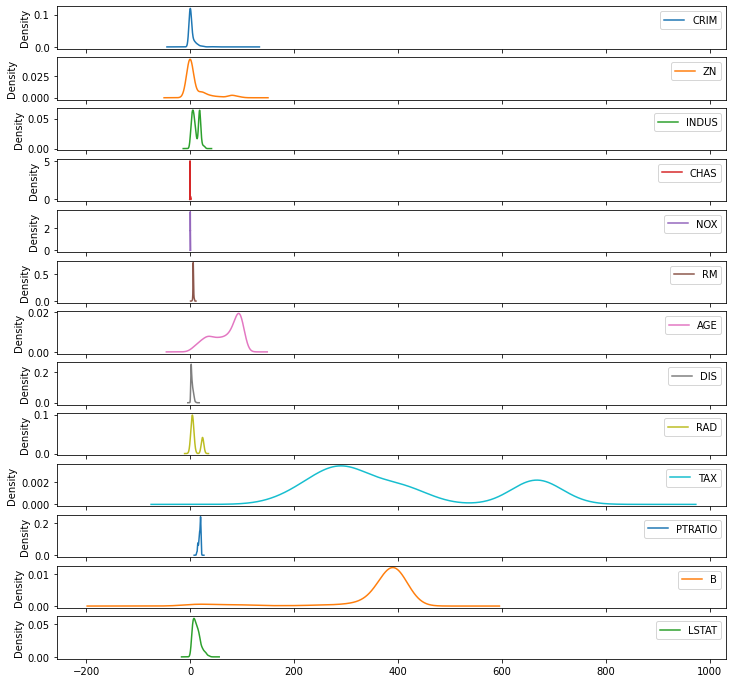

In [3]:
df.plot(kind='kde', subplots=True, figsize=(12,12))

In [4]:
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993


<AxesSubplot:>

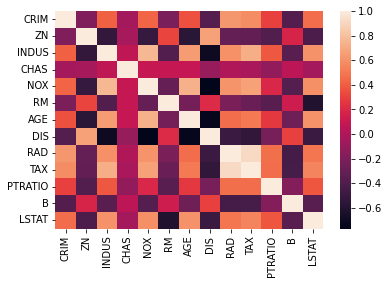

In [5]:
import seaborn as sns

sns.heatmap(df.corr())

In [6]:
target

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


In [7]:
d = pd.DataFrame(df)
d.to_csv("Boston House Prices dataset.csv", index = False)

In [8]:
X = df
y = target["MEDV"]
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [9]:
lm = linear_model.LinearRegression()
model = lm.fit(X_train,y_train)

In [10]:
y_pred = lm.predict(X_test)
y_pred

array([19.04051989, 31.82889532, 30.46484504, 30.16851084, 19.16764543,
       18.59750613, 24.77856643, 17.10284727, 31.54912026, 12.3185322 ,
       18.90065191, 32.03758034, 24.65056976, 23.80403864, 24.80702193,
       20.33308235, 38.8206796 ,  8.24736135, 21.56485112, 21.356066  ,
       20.64583138, 29.16465694, 35.51824175, 33.74120474, 22.34686744,
       28.97366895, 22.99255441, 29.25681759, 19.92448518, 20.27140263,
       27.61705768,  8.56887443, 18.32511323, 14.72905451, 23.20367169,
       23.25834605, 20.56245922, 15.98814057, 26.45436698,  8.21346778,
       22.93314995, 30.72924349, 10.78193992, 17.03210515, 20.17432632,
       32.08435571, 12.45861097, 11.08854596, 17.05253699, 27.38107455,
       34.52267374, 32.5829497 , 27.53624071, 20.08500488, 22.15447717,
       21.67976571, 22.17383909, 17.15602796, 12.63907634, 37.44019066,
       29.62404074, 23.66787183, 18.14236781, 35.16941022, 23.76267622,
       17.75148283, 16.36376154, 14.02081856, 21.06227138, 28.39

In [11]:
mean_squared_error(y_test,y_pred)

23.680127092868567

In [12]:
lm.score(X_train,y_train)

0.7411317727810458

In [13]:
lm.score(X_test,y_test)

0.7250021658722302

In [14]:
lm.coef_

array([-6.19794457e-02,  4.78097371e-02,  4.73905813e-02,  1.32227341e+00,
       -1.82107954e+01,  3.70916566e+00, -8.92716005e-03, -1.61422104e+00,
        2.89959335e-01, -1.28409876e-02, -1.05011705e+00,  9.94511020e-03,
       -5.30508358e-01])